Muestreo Thompson
=================

El Muestreo de Thompson no crea un mecanismo para resolver el problema (el bandido multi brazo), sino que asocia una distribución de probabilidad a cada uno de los bandidos que puede ser usada para estimar los resultados originales. A medida que aumenta el número de veces que se ha jugado con cada uno de los bandidos, la forma de las distribuciones se irá haciendo más estrechas en torno a la media. Por lo que, al obtener una muestra de cada una de las distribuciones es más probable que esta se encuentre cerca del valor esperado para ese bandido. Se basa en la inferencia Bayesiana, por lo que los conceptos que utilizaremos son:

* El anuncio $i$ da una recompensa $y$ que sigue una distribución de Bernoulli $p(y|\theta_i) \sim \Beta(\theta_i)$.

* $\theta_i$ es desconocido pero se supone que tiene una distribución uniforme $p(\theta_i) \sim U([0, 1])$ llamada distribución a priori.

* Aproximamos por distribución a posteriori $p(\theta_i|y) = \frac{p(y|\theta_i)p(\theta_i)}{\int p(y|\theta_i)p(\theta_i)d\theta_i} 	\propto p(y|\theta_i) \times p(\theta_i)$.

* Obtenemos $p(\theta_i|y) \sim \beta(éxitos + 1,fracasos + 1)$

* A cada ronda $n$, obtenemos un valor aleatorio $\theta_i(n)$ de la distribución a posteriori p(\theta_i|y) para cada anuncio $i$.

* A cada ronda $n$, seleccionamos el anuncio $i$ que maximiza $\theta_i(n)$.

El algoritmo es el siguiente:

1.- A cada ronda $n$, se consideran dos números $N^1_i(n)$ y $N^0_i(n)$ que representan el número de éxitos y fracasos del anuncio $i$ respectivamente.

2.- Para cada anuncio $i$, se elige un valor aleatorio generado por una distribución $\theta_i(n) = \beta(N^1_i(n) + 1, N^0_i(n) + 1)$.

3.- Se selecciona el anuncio $i$ que maximiza $\theta_i(n)$.

Implementación
===============

In [9]:
import numpy as numpy
import matplotlib.pyplot as plt
import pandas as pd
import math
import random

# Importamos el dataset
dataset = pd.read_csv('./datasets/Ads_CTR_Optimisation.csv')

# Implementar Thompson Sampling
d = 10
N = 10000
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
ads_selected = []
total_reward = 0

for n in range(0, N):

    ad = 0
    max_random = 0

    for i in range(0, d):

        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)

        if random_beta > max_random:
            max_random = random_beta
            ad = i

    ads_selected.append(ad)
    reward = dataset.values[n, ad]

    if reward == 1:
        numbers_of_rewards_1[ad] += 1
    else:
        numbers_of_rewards_0[ad] += 1

    total_reward += reward

print('Total reward: ' + str(total_reward))

Total reward: 2606


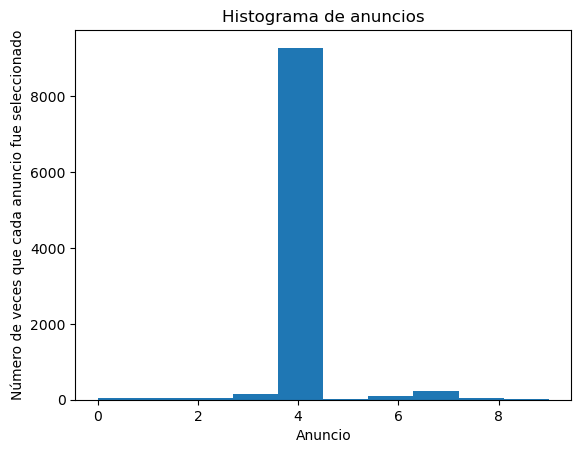

In [10]:
# Visualizar los resultados
plt.hist(ads_selected)
plt.title('Histograma de anuncios')
plt.xlabel('Anuncio')
plt.ylabel('Número de veces que cada anuncio fue seleccionado')
plt.show()

Referencias:

https://www.analyticslane.com/2021/04/30/muestreo-de-thompson-y-bayesucb-para-un-problema-bandido-multibrazo-multi-armed-bandit/